<a href="https://colab.research.google.com/github/yassmin1/Analytics_Projects/blob/main/ab_test_results_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Analyzing A/B Test Results
**Objective**: The objective of an A/B test project for a web page is to compare two or more versions of a web page to see which one performs better. This can be done by measuring metric as conversion rate.    
By running an A/B test, you can gather data to make informed decisions about which version of the web page to use on your live site.
#### EDA


In [ ]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

In [ ]:
inputdir=r'C:\Users\Rayan\OneDrive\GreatLearning_DSBA\business_analytics\data_analysis_projects\AB_test\ab_data.csv'
df = pd.read_csv(inputdir)
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [ ]:
df.shape    # here shape is not a function

(294478, 5)

<Axes: xlabel='landing_page', ylabel='count'>

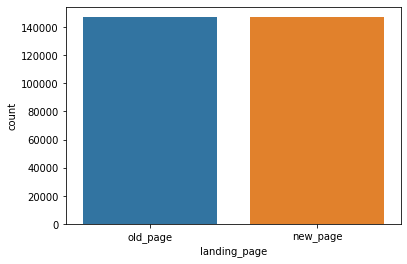

In [ ]:
sns.countplot(data=df,x='landing_page')

<Axes: xlabel='group', ylabel='count'>

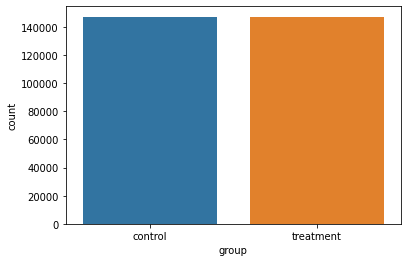

In [ ]:
sns.countplot(data=df,x='group')

<Axes: xlabel='converted', ylabel='count'>

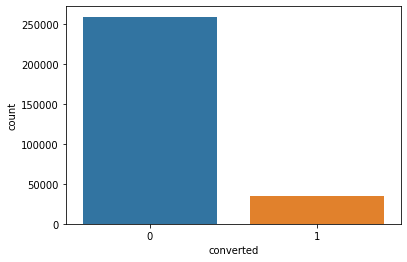

In [ ]:
sns.countplot(data=df,x='converted')

In [ ]:
df['timestamp']=pd.to_datetime(df['timestamp'])

In [ ]:
df.sort_values(by='timestamp',inplace=True)

In [ ]:
print(df['timestamp'].dt.year.unique())
print(df['timestamp'].dt.month.unique())
df['month']=df['timestamp'].dt.month
df['weekday']=df['timestamp'].dt.weekday
df['day']=df['timestamp'].dt.day

[2017]
[1]


<Axes: xlabel='weekday'>

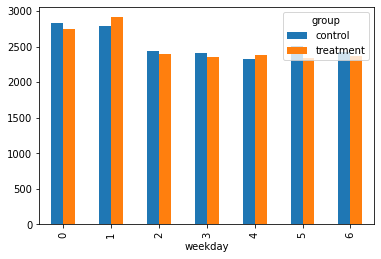

In [ ]:
df.groupby(['weekday','group'])['converted'].sum().unstack().plot.bar()

<Axes: xlabel='day'>

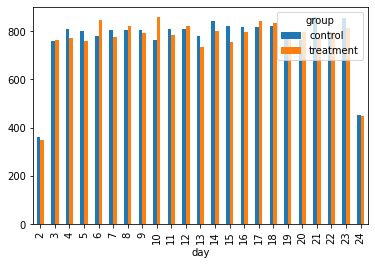

In [ ]:
df.groupby(['day','group'])['converted'].sum().unstack().plot.bar()

In [ ]:
#the number of unique user IDs in a pandas DataFrame called df.
# The nunique() method is used to count the number of unique values in the 'user_id'
# column of the DataFrame. The result is stored in the variable unique_user.
unique_user = df['user_id'].nunique()
unique_user

290584

In [ ]:
df.converted.mean()   # here ask the users converted

0.11965919355605512

In [ ]:
#The number of times the `new_page` and `treatment` don't line up.
not_line_up_1 = df.query(" group=='treatment' and landing_page=='old_page'").count()

In [ ]:
not_line_up_2 = df.query(" group=='control' and landing_page=='new_page'").count()

In [ ]:
not_line_up_1 + not_line_up_2

user_id         3893
timestamp       3893
group           3893
landing_page    3893
converted       3893
dtype: int64

In [ ]:
df.isnull().sum()

user_id         0
timestamp       0
group           0
landing_page    0
converted       0
dtype: int64

In [ ]:
# only store the aligned data in df2
df2 = df[((df['group'] == 'treatment') == (df['landing_page'] == 'new_page')) == True]
df2.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [ ]:
# Double Check all of the incorrect rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

In [ ]:
df2['converted'].value_counts()

0    255832
1     34753
Name: converted, dtype: int64

In [ ]:
df2['user_id'].nunique()

290584

In [ ]:
df2['user_id'].duplicated().sum()

1

In [ ]:
# to show the duplicated two rows , set "keep = False"
df2[df2['user_id'].duplicated(keep=False)]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


In [ ]:
# drop duplicates
df2.drop_duplicates(keep='first')
df2.duplicated().sum()

0

In [ ]:
round(df2.converted.mean(),4)

0.1196

In [ ]:
# Given that an individual was in the `control` group, what is the probability they converted?
# Bayes rules
control_ver =float(df2.query("group=='control' and converted=='1'")['user_id'].nunique() )
control = float(df2.query("group=='control'")['user_id'].nunique())
round(control_ver / control,4)

0.0

In [ ]:
# Given that an individual was in the `treatment` group, what is the probability they converted?
# Bayes rules
treat_ver =float(df2.query("group=='treatment' and converted=='1'")['user_id'].nunique() )
treat = float(df2.query("group=='treatment'")['user_id'].nunique())
round(treat_ver / treat,4)

0.0

In [ ]:
# What is the probability that an individual received the new page?
new_page = float(df2.query("landing_page == 'new_page'")['user_id'].nunique())
total = float(df2.shape[0])
round(new_page / total,4)

0.5001

In [ ]:
# What is the converted probability Given that an individual was in new landing page?
old_page = float(df2.query("landing_page == 'new_page' and converted == 1 ")['user_id'].nunique())
total = float(df2.query("landing_page == 'new_page'")['user_id'].nunique())

round(old_page / total,4)

0.1188

<a id='ab_test'></a>
##  A/B Test

#### to expaline the results :
* If P value is really small,  less likely to observe the statistic in the null , more likely from the alternative.
* p-value is large you will end up staying with the null hypothesis as your choice.

* Type 1 error threshold is alpha
* If p < alpha ,  reject the null , choose H1
* If p > alpha , fail to reject the null, choose H0






`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**.

 which are the converted rates for the old and new pages?     

* H_O : p(new)-p(old)<=0  old has better conversion
* H_1 : p(new)-p(old)>0   new has better conversion


Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>
Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>
Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>


In [ ]:
# What is the **convert rate** for $p_{new}$ under the null?

p_new = round(float(df2.query('converted==1').user_id.nunique()) / float(df2.shape[0]), 4)
print(p_new)


0.1196


In [ ]:
# What is the **convert rate** for $p_{old}$ under the null? <br><br>
p_old = round(float(df2.query('converted==1').user_id.nunique()) / float(df2.shape[0]) , 4 )
p_old

0.1196

In [ ]:
# unique number of accessing new page
N_new = df2.query('landing_page == "new_page"')['user_id'].nunique()
N_new


145310

In [ ]:
# unique number of accessing old page
N_old = df2.query('landing_page == "old_page"')['user_id'].nunique()
N_old

145274



e. Simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [ ]:
new_page_converted = np.random.choice([0,1] , N_new , p=(p_new,1-p_new))
new_page_converted


array([1, 1, 1, ..., 1, 1, 1])

<Axes: ylabel='Density'>

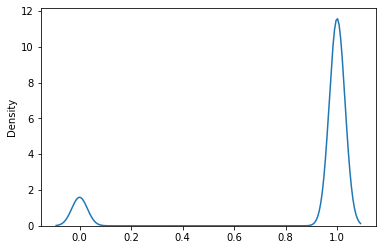

In [ ]:
sns.kdeplot(new_page_converted)

### Simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [ ]:
old_page_converted = np.random.choice([0,1] , N_old , p=(p_old,1-p_old))
old_page_converted

array([1, 1, 1, ..., 1, 1, 1])

<Axes: ylabel='Density'>

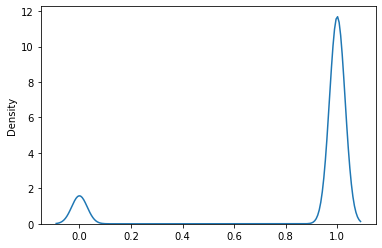

In [ ]:
sns.kdeplot(old_page_converted)

In [ ]:
new_page_converted.mean() , old_page_converted.mean()

(0.8789966278989746, 0.8808871511763977)

In [ ]:
# Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).
obs_diff = new_page_converted.mean() - old_page_converted.mean()
obs_diff

-0.0018905232774231173

In [ ]:
# Simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process similarly to the one you calculated in parts **a. through g.** above.  Store all 10,000 values in **p_diffs**.

p_diffs=[]
new_convert=np.random.binomial(N_new, p_new, 10000)/N_new
old_convert=np.random.binomial(N_old, p_old, 10000)/N_old
p_diffs=new_convert-old_convert




<Axes: ylabel='Density'>

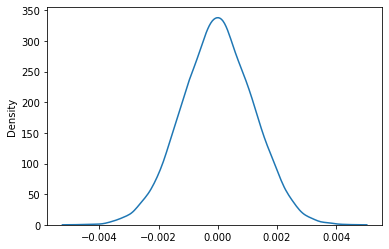

In [ ]:
# i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?
# Use the matching problem in the classroom to assure you fully understand what was computed here.
p_diffs = np.array(p_diffs)
sns.kdeplot(p_diffs)


In [ ]:
#We perform this analysis to determine the observed difference in conversion rate between two landing pages
# in a dataset. This can help us
# understand how the design of the website or marketing campaign affected the conversion rates for each page.
#compute actual conversion rate
# number of landing new page and converted  / number of landing new page
converted_new = df2.query('converted == 1 and landing_page== "new_page"')['user_id'].nunique()
actual_new = float(converted_new) / float(N_new)

# number of landing old page and converted  / number of landing old page
converted_old = df2.query('converted == 1 and landing_page== "old_page"')['user_id'].nunique()
actual_old = float(converted_old) / float(N_old)

#observed difference in converted rate
obs_diff = actual_diff = actual_new - actual_old
obs_diff

-0.0015782389853555567

In [ ]:
# What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?
# create distribution under the null hypothesis
null_vals = np.random.normal(0, p_diffs.std(), p_diffs.size)

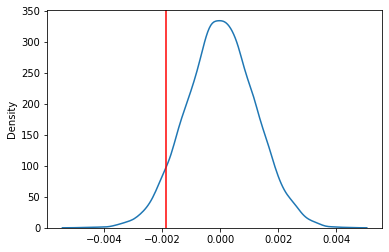

In [ ]:
#Plot Null distribution
sns.kdeplot(null_vals)
#Plot vertical line for observed statistic
plt.axvline(x=obs_diff,color ='red')

In [ ]:
(null_vals > obs_diff).mean()

0.9444

The value 0.9061 we call it P-value, which suggests if there is a significant difference between 2 groups for a hypothesis. In this case, the new page doesn't have better conversion rates than the old page because the value 0.9 is much higher than the alpha, 0.05(Type I error rate ). We fail to reject the null. Therefore, the data show, with a type I error rate of 0.05, that the old page has higher probablity of convert rate than new page.

### using statsmodels
 We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [ ]:
import statsmodels.api as sm

convert_old = df2.query('converted == 1 and landing_page== "old_page"').user_id.nunique()
convert_new = converted_old = df2.query('converted == 1 and landing_page== "new_page"').user_id.nunique()
n_old = df2.query('landing_page == "old_page"')['user_id'].nunique()
n_new = df2.query('landing_page == "new_page"')['user_id'].nunique()

convert_old,convert_new , n_old , n_new

(17489, 17264, 145274, 145310)

Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.
The formula for performing a z-test for proportions is:

z = (p1 - p2 - 0) / sqrt(p1 * (1 - p1) / n1 + p2 * (1 - p2) / n2)

where:

z is the calculated z-score
p1 and p2 are the proportions in the two groups
n1 and n2 are the sample sizes in the two groups
The z-score is calculated by subtracting the proportion of one group from the proportion of the other group from 0, and then dividing by the standard




In [ ]:
# compute the sm.stats.proportions_ztest using the alternative
#  it's a one tail test so a z-score past 1.96 will be significant.
z_score, p_value = sm.stats.proportions_ztest(np.array([convert_new,convert_old]),np.array([n_new,n_old]), alternative = 'larger')
z_score, p_value=round(z_score,3), round(p_value,3)
z_score, p_value


(-1.311, 0.905)

In [ ]:
#We perform this analysis to determine the observed difference in conversion rate between two landing pages
# in a dataset. This can help us
# understand how the design of the website or marketing campaign affected the conversion rates for each page.
#compute actual conversion rate
# number of landing new page and converted  / number of landing new page
converted_new = df2.query('converted == 1 and landing_page== "new_page"')['user_id'].nunique()
actual_new = float(converted_new) / float(N_new)

# number of landing old page and converted  / number of landing old page
converted_old = df2.query('converted == 1 and landing_page== "old_page"')['user_id'].nunique()
actual_old = float(converted_old) / float(N_old)

#observed difference in converted rate
obs_diff = actual_diff = actual_new - actual_old
obs_diff

-0.0015782389853555567

In [ ]:
#We perform this analysis to determine the observed difference in conversion rate between two landing pages
# in a dataset. This can help us
# understand how the design of the website or marketing campaign affected the conversion rates for each page.
#compute actual conversion rate
# number of landing new page and converted  / number of landing new page
converted_new = df2.query('converted == 1 and landing_page== "new_page"')['user_id'].nunique()
actual_new = float(converted_new) / float(N_new)

# number of landing old page and converted  / number of landing old page
converted_old = df2.query('converted == 1 and landing_page== "old_page"')['user_id'].nunique()
actual_old = float(converted_old) / float(N_old)

#observed difference in converted rate
obs_diff = actual_diff = actual_new - actual_old
obs_diff

-0.0015782389853555567

In [ ]:
# to determine the significance of a z-score and the
# critical value at 95% confidence for a normal distribution.
from scipy.stats import norm

norm.cdf(z_score) , norm.ppf(1-(0.05/2))
norm.cdf(z_score)   # how significant our z-score is
norm.ppf(1-(0.05/2)) # what our critical value at 95% confidence is

1.959963984540054

* Since the z-score of 1.3109241984234394 does not exceed the critical value of 1.959963984540054, we fail to reject the null hypothesis. Therefore, the converted rate for new page and old page have no difference.
* The z-score is greater than the value of -0.1645 (one-tail test) and hence it suggests that we can't reject the null.
* And the p-value suggests that there is no statistically significant difference betweem the new and the old page.

<a id='regression'></a>
###  A regression approach


The goal is to use **statsmodels** to fit the regression model you specified in part to see if there is a significant difference in conversion based on which page a customer receives.
1. reate a colun for the intercept, and create a dummy variable column for which page each user received.
2. Add an **intercept** column,
3. Add **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [ ]:
# create a colun for the intercept
df2['intercept'] = 1
df2.head()

C:\Users\Rayan\AppData\Local\Temp\ipykernel_8332\2680496232.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['intercept'] = 1


,user_id,timestamp,group,landing_page,converted,intercept,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0


In [ ]:
# create a dummy variable column for which page each user received
df2['ab_page'] = pd.get_dummies(df['group'])['treatment']
df2.head()

C:\Users\Rayan\AppData\Local\Temp\ipykernel_8332\3444522949.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['ab_page'] = pd.get_dummies(df['group'])['treatment']


,user_id,timestamp,group,landing_page,converted,intercept,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0


using the two columns you created to predict whether or not an individual converts.
This code performs logistic regression analysis on a dataset called df2. The dependent variable is converted, which is a binary variable indicating whether a user converted or not. The independent variables are intercept and ab_page, which are the intercept and the effect of the ab_page variable on the conversion rate.

The sm.Logit() function is used to create a logistic regression model using the statsmodels library. The df2['converted'] column is the dependent variable, and the df2[['intercept','ab_page']] expression specifies the independent variables.

The fit() method is then called on the logistic regression model to estimate the parameters of the model. The results are stored in a variable called results.

In [ ]:
log_mod = sm.Logit(df2['converted'], df2[['intercept','ab_page']])
results = log_mod.fit()


Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


In [ ]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290585
Model:                          Logit   Df Residuals:                   290583
Method:                           MLE   Df Model:                            1
Date:                Tue, 19 Dec 2023   Pseudo R-squ.:               8.085e-06
Time:                        12:55:44   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1897
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.312      0.190      -0.037       0.007
==============================================================================
"""

The p values differe based on the method. Why does it differ from the value you found in the **Part II**?

* p-value associated with ab_page is 0.19, which is different from the value found in PartII (0.9).

* Reason :
* In Part II, A/B Test method , the hypothesis test is under :  
* null hypothesis: 𝑝_𝑛𝑒𝑤 <=  𝑝_𝑜𝑙𝑑 , Alternative hypothesis p_new > p_old
* In Part III under logistic model, the hypothesis test is under :
* null hypothesis: 𝑝_𝑛𝑒𝑤 =  𝑝_𝑜𝑙𝑑 , Alternative hypothesis p_new ≠ p_old
* Part III under regression method 'not equal' which is a two sided test, while Part II under A/B test method is a one tailed test

* it has something to do with the bimodal distribution. We actually have an effect that the old page has slightly better
conversion, the p-value is essentially 2(1 - (value)), to shade the tails. It essentially suggests there is not statistical
evidence of a difference in the two conversion rates, but the connection between the p-value here and the p-value above is a  bit disconnected because of the directional component of the previous alternative hypothesis.




Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives.
Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy varaibles.** Provide the statistical output as well as a written response to answer this question.

In [ ]:
df_country = pd.read_csv(r'C:\Users\Rayan\OneDrive\GreatLearning_DSBA\business_analytics\data_analysis_projects\AB_test\countries.csv')
df_country.head()

,user_id,country
0,834778,UK
1,928468,US
2,822059,UK
3,711597,UK
4,710616,UK


In [ ]:
# join two dataframes on common column 'user_id'
df3 = df2.join(df_country.set_index('user_id'),on='user_id')
df3.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page,country
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,US
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,US
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,US
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,US
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0,US


In [ ]:
df3['country'].value_counts()

US    203620
UK     72466
CA     14499
Name: country, dtype: int64

In [ ]:
# create dummy variables for country
df3[['US','UK','CA']] = pd.get_dummies(df3['country'])
df3 = df3.drop(df3['CA'])
df3['intercept'] = 1
log_mod = sm.Logit(df3['converted'], df3[['intercept','US','UK','ab_page']])
results = log_mod.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.366114
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290583
Model:                          Logit   Df Residuals:                   290579
Method:                           MLE   Df Model:                            3
Date:                Tue, 19 Dec 2023   Pseudo R-squ.:               2.326e-05
Time:                        13:06:08   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1756
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9893      0.009   -223.760      0.000      -2.007      -1.972
US            -0.0408      0.027     -1.516      0.129      -0.093       0.012
UK             0.0099      0.013      0.743      0.458      -0.016       0.036
ab_page       -0.0150      0.011     -1.309      0.191      -0.037       0.007
==============================================================================
"""

In [ ]:
np.exp(results.params)

intercept    0.136797
US           0.960057
UK           1.009926
ab_page      0.985145
dtype: float64

A one-unit increase in converted is associated with a 0.9 times increase in the odds of being US. and 0,9 times increase in ab_pages

In [ ]:
1/np.exp(-0.0150),np.exp(0.0506),np.exp(0.0408)

(1.015113064615719, 1.0519020483004984, 1.0416437559600236)

Now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

In [ ]:
# create dummy variables for country
df3['intercept'] = 1
# interaction between page and country
df3['US_new'] = df3['US'] * df3['ab_page']
df3['UK_new'] = df3['UK'] * df3['ab_page']
log_mod = sm.Logit(df3['converted'], df3[['intercept','ab_page','US','UK','US_new' ,'UK_new' ]])
results = log_mod.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.366110
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290583
Model:                          Logit   Df Residuals:                   290577
Method:                           MLE   Df Model:                            5
Date:                Tue, 19 Dec 2023   Pseudo R-squ.:               3.485e-05
Time:                        11:45:31   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1915
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9865      0.010   -206.341      0.000      -2.005      -1.968
ab_page       -0.0206      0.014     -1.508      0.132      -0.047       0.006
US            -0.0176      0.038     -0.466      0.641      -0.091       0.056
UK            -0.0058      0.019     -0.307      0.759      -0.043       0.031
US_new        -0.0469      0.054     -0.871      0.384      -0.152       0.059
UK_new         0.0314      0.027      1.182      0.237      -0.021       0.084
==============================================================================
"""

using baysian statistics

In [ ]:
convert_old = df2.query('converted == 1 and landing_page== "old_page"').user_id.nunique()
convert_new = converted_old = df2.query('converted == 1 and landing_page== "new_page"').user_id.nunique()
n_old = df2.query('landing_page == "old_page"')['user_id'].nunique()
n_new = df2.query('landing_page == "new_page"')['user_id'].nunique()


convert_old,convert_new , n_old , n_new

(17489, 17264, 145274, 145310)

In [ ]:
n_old_avg,n_old_std=df2.query('landing_page== "old_page"').user_id.unique().mean(),df2.query('landing_page== "old_page"').user_id.unique().std()
n_new_avg,n_new_std=df2.query('landing_page== "new_page"').user_id.unique().mean(),df2.query('landing_page== "new_page"').user_id.unique().std()
n_old_avg,n_old_std,n_new_avg,n_new_std

(788164.0725938571, 91287.60040825981, 787845.7192897942, 91161.25074915121)

## 1.method baysian inference

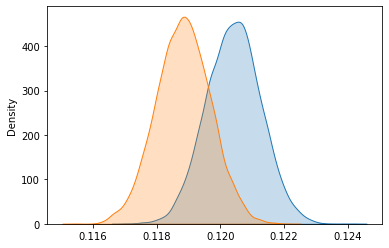

In [ ]:
# Set prior parameters and calculate number of successes
beta_prior_a = 1
beta_prior_b = 1
num_successes_old = convert_old
num_successes_new = convert_new
# Generate 10000 posterior draws
def simulate_beta_dist(num_successes,beta_prior_a,beta_prior_b):
  posterior_draws = np.random.beta(
    num_successes + beta_prior_a,
  n_old - num_successes + beta_prior_b,
    10000)
  return posterior_draws
posterior_draws_old=simulate_beta_dist(num_successes_old,beta_prior_a,beta_prior_b)
posterior_draws_new=simulate_beta_dist(num_successes_new,beta_prior_a,beta_prior_b)
# Plot density of posterior_draws
sns.kdeplot(posterior_draws_old, shade=True)
sns.kdeplot(posterior_draws_new, shade=True)


plt.show()

You decide to run A/B testing, modeling the data using the binomial likelihood. You found out that a typical click-through rate for the previous ads has been around 15% recently,
with results varying between 5% and 30%. Based on this, you conclude that

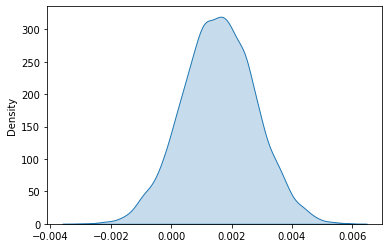

In [ ]:
# Calculate posterior difference and plot it
diff = posterior_draws_old-posterior_draws_new
sns.kdeplot(diff, shade=True, label="diff")
plt.show()

In [ ]:
#Probability of old being better:
print(f'Probability of old being better is {(diff > 0).mean()}')

Probability of old being better is 0.9055


In [ ]:
#Probability of new being better:
print(f'Probability of new being better is {(diff < 0).mean()}')

Probability of new being better is 0.0945


In [ ]:
# Slice diff to take only cases where it is negative
loss =diff[diff<0]

# Compute and print expected loss
expected_loss = loss.mean()
print(f'the expected loss in case we choose the new is {expected_loss}')